In [1]:
!pip install opencv-python
!pip install mediapipe

In [2]:
!pip install opencv-contrib-python

In [3]:
import cv2
import time
import math as m
import mediapipe as mp
import os

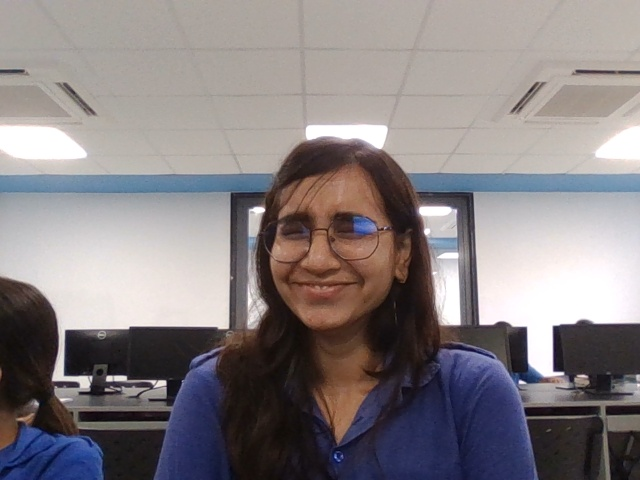

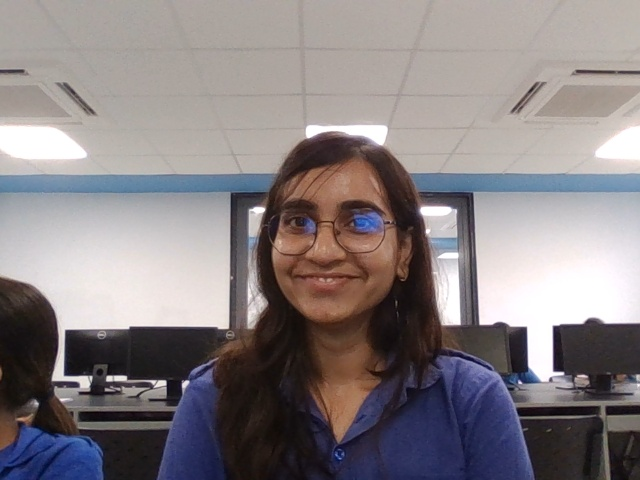

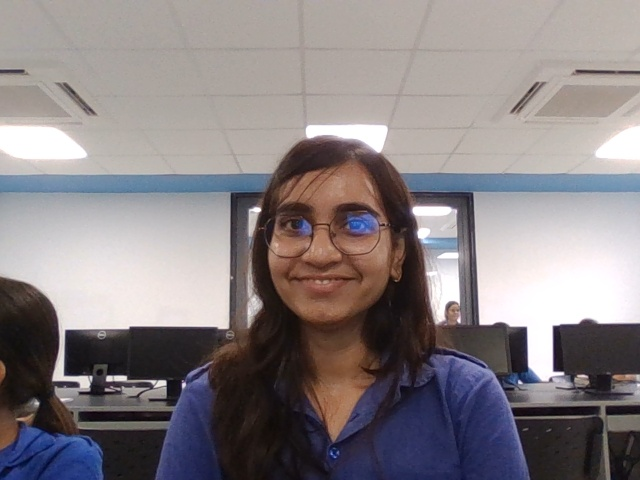

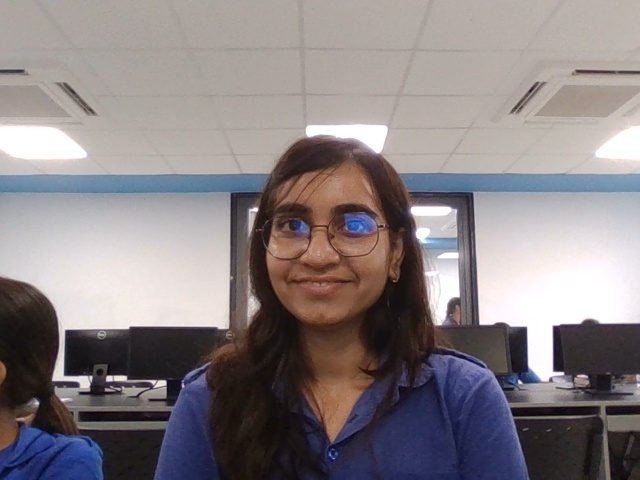

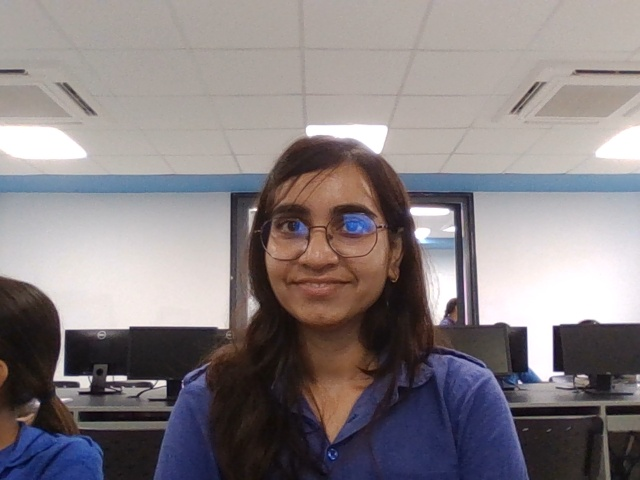

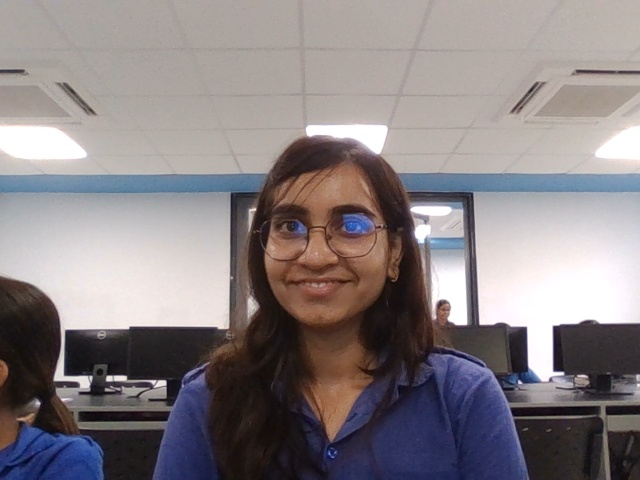

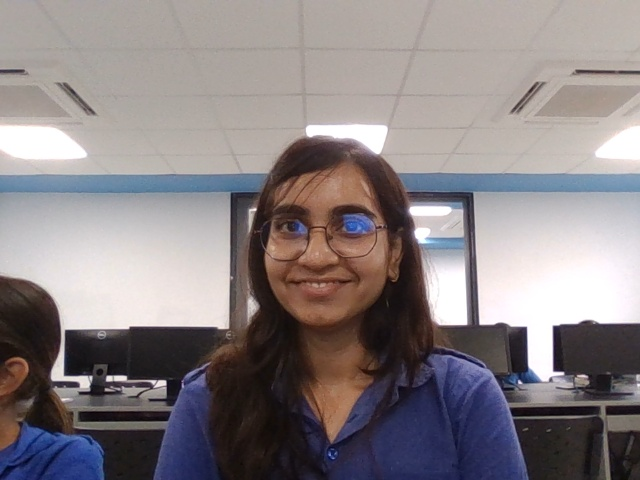

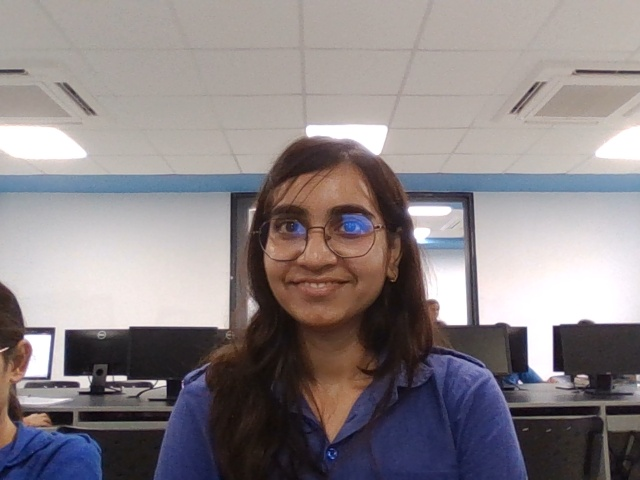

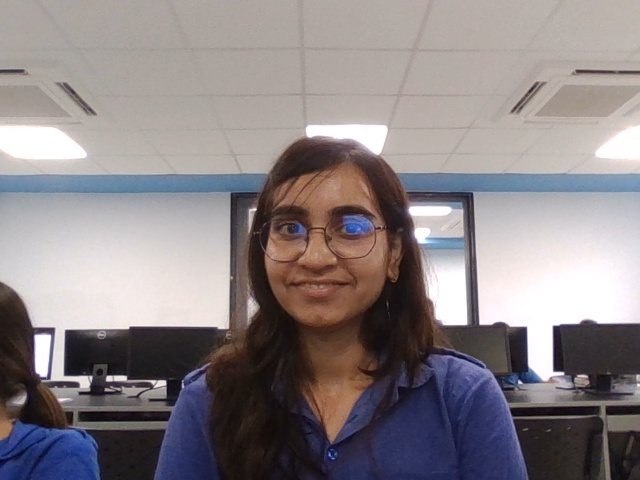

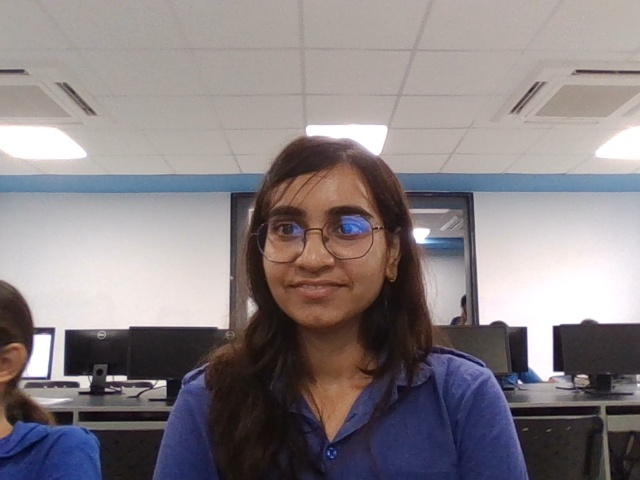

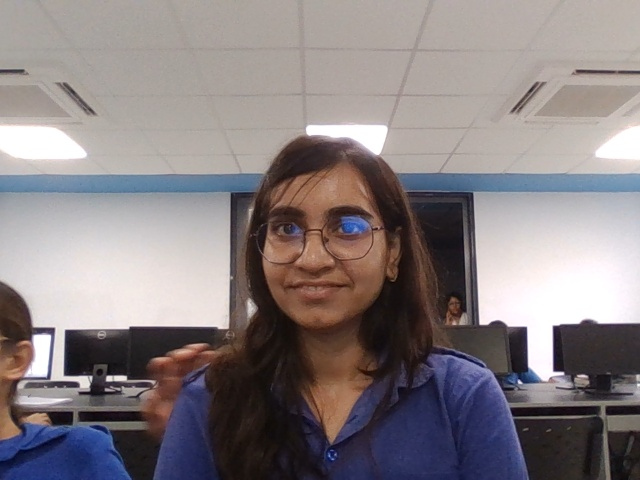

In [4]:
import cv2
from IPython.display import display, Image
import io

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

image_count = 0

while image_count<=10:
    ret, frame = cap.read()

    if ret:
        cv2.imshow("Webcam", frame)
        
        # Save the captured image to a buffer
        ret, buffer = cv2.imencode('.jpg', frame)
        if not ret:
            print("Error: Could not encode frame.")
            break
        
        # Display the captured image in the notebook
        display(Image(data=buffer.tobytes()))

        # Save the captured image to a file
        image_filename = f"image_{image_count}.jpg"
        cv2.imwrite('C:/Users/Owner/content/' + image_filename, frame)
        
        image_count += 1

        # Exit the loop if the 'q' key is pressed
        if cv2.waitKey(1000) & 0xFF == ord('q'):
            break
    else:
        print("Error: Could not read frame from camera.")
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [5]:
# Initilize medipipe selfie segmentation class.
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [6]:
def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

In [7]:
# Calculate angle.
def findAngle(x1, y1, x2, y2):
    theta = m.acos((y2 -y1)*(-y1) / (m.sqrt((x2 - x1)**2 + (y2 - y1)**2) * y1))
    degree = int(180/m.pi)*theta
    return degree

In [8]:
def sendWarning():
    print('YOU ARE IN WRONG POSITION FOR LONG TIME')

In [9]:
# Initilize frame counters.
good_frames = 0
bad_frames = 0

# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX

# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)

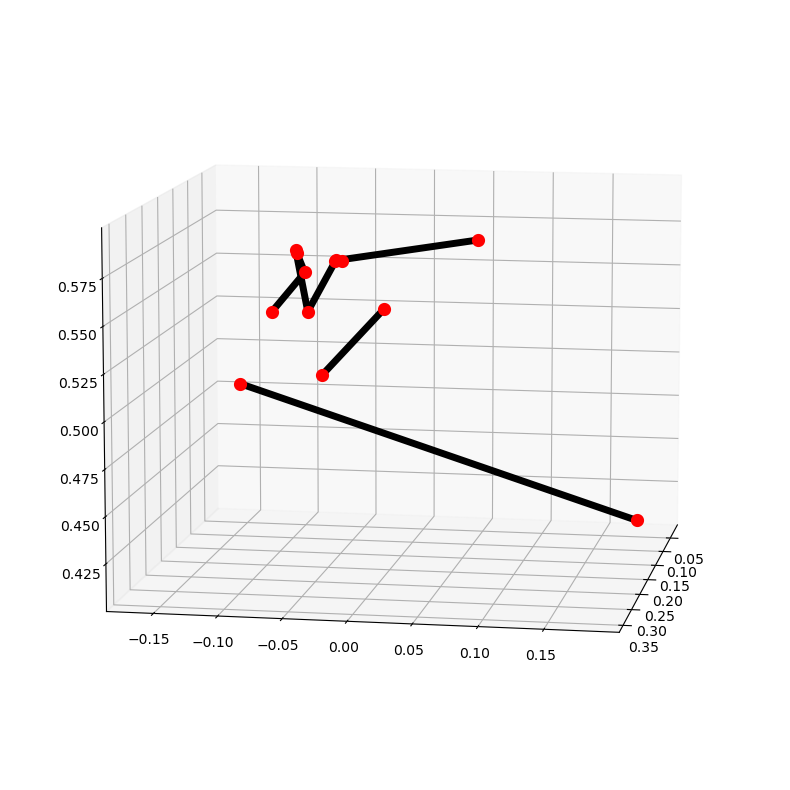

z: -592.1550369262695


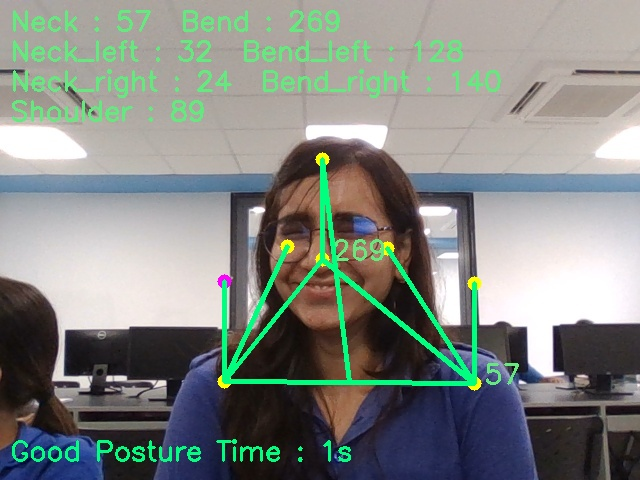

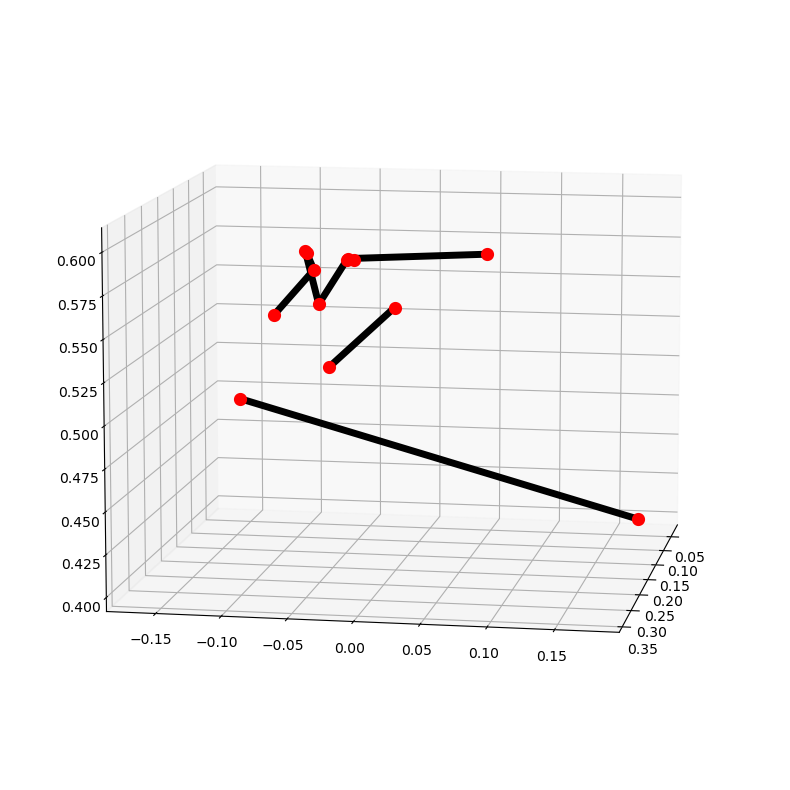

z: -580.9717559814453


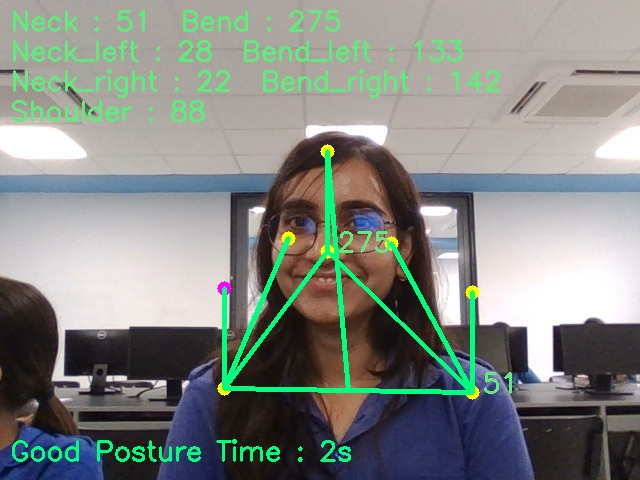

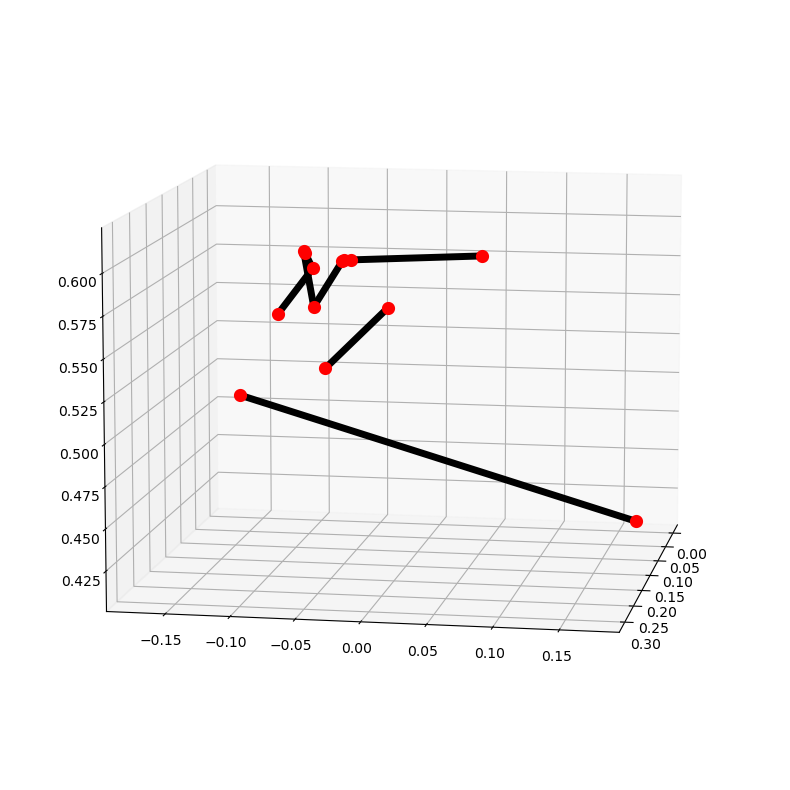

z: -505.62374114990234


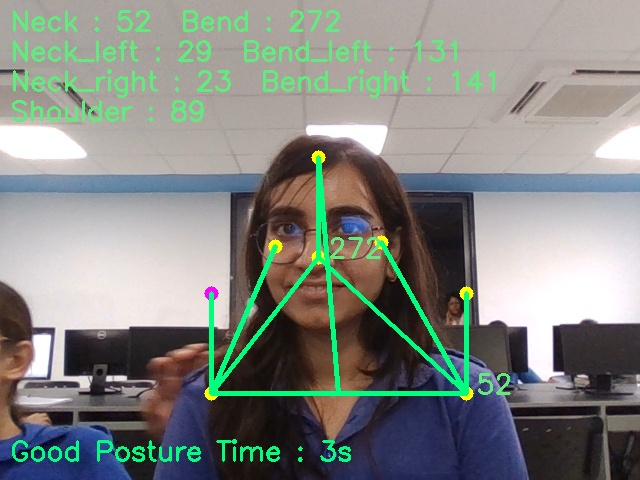

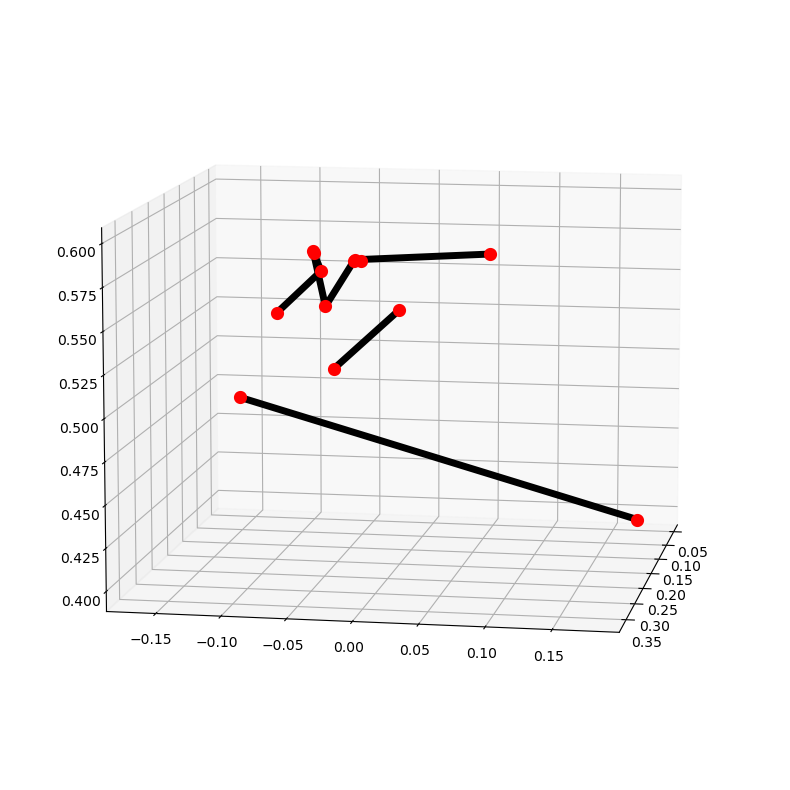

z: -576.6066741943359
YOU ARE IN WRONG POSITION FOR LONG TIME


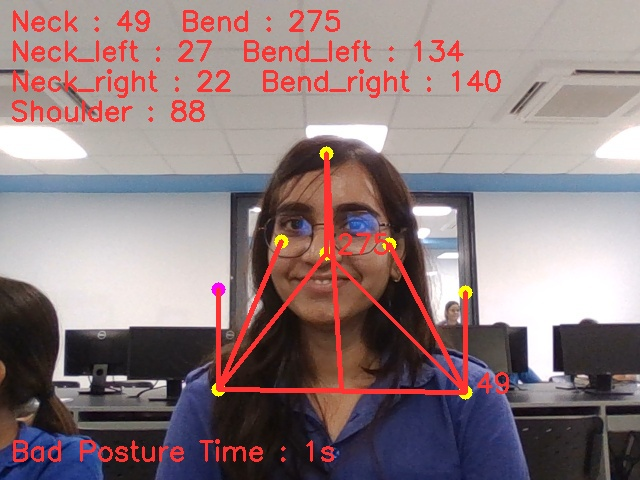

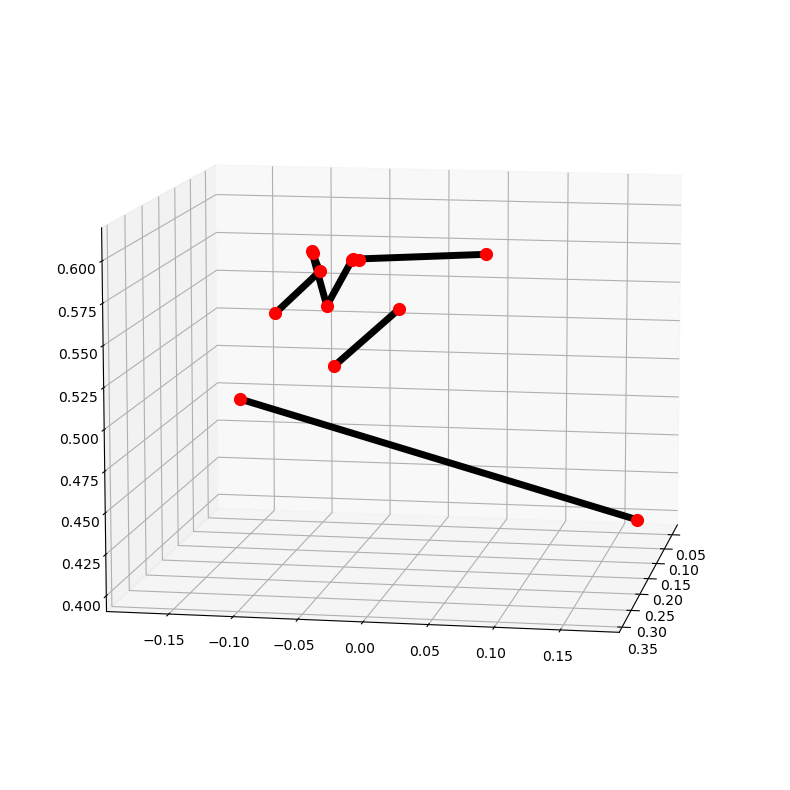

z: -461.2451171875
YOU ARE IN WRONG POSITION FOR LONG TIME


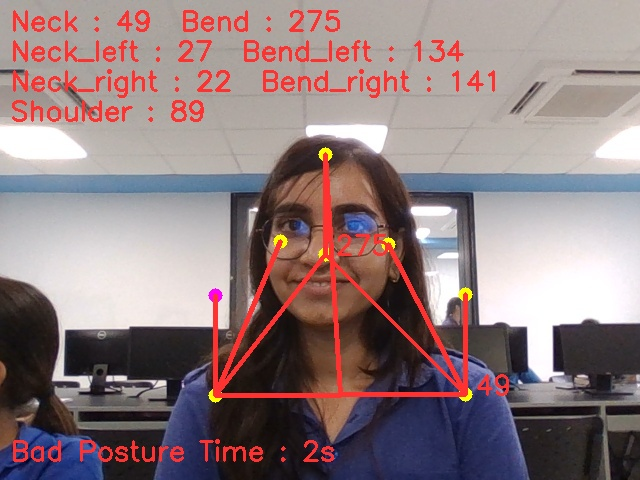

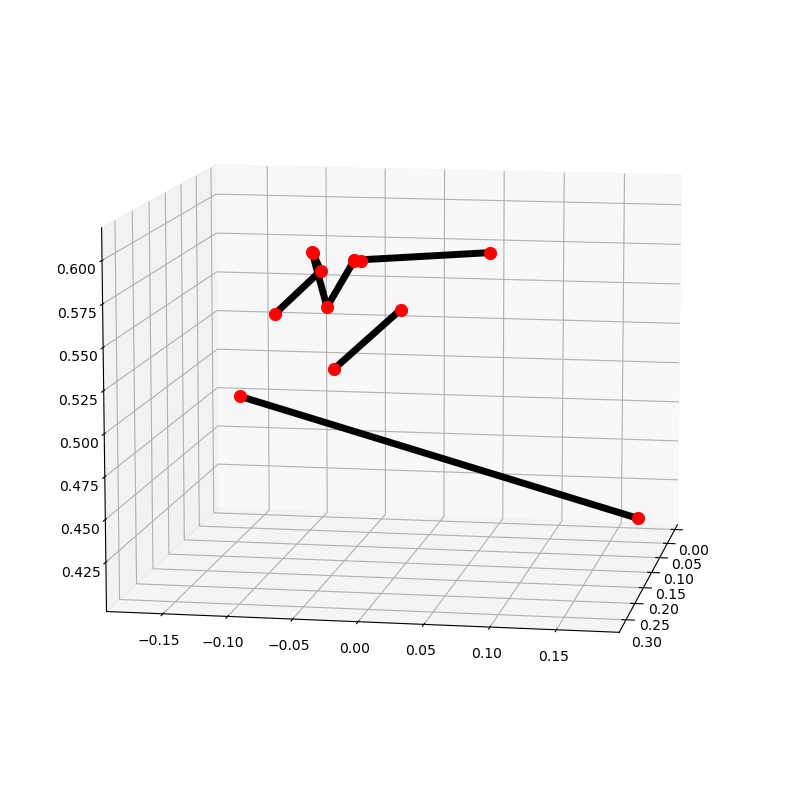

z: -486.97315216064453
YOU ARE IN WRONG POSITION FOR LONG TIME


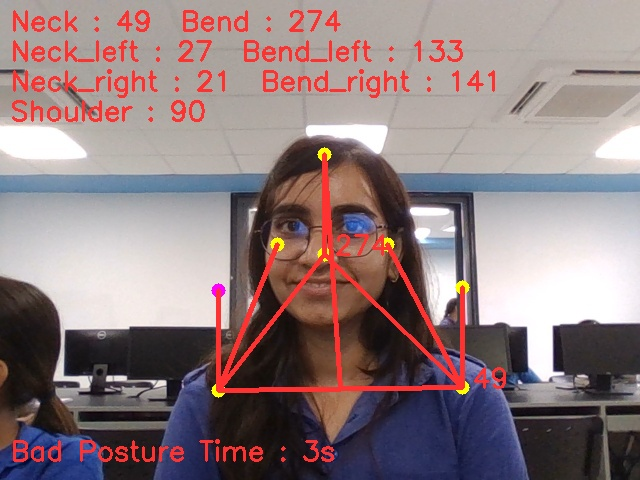

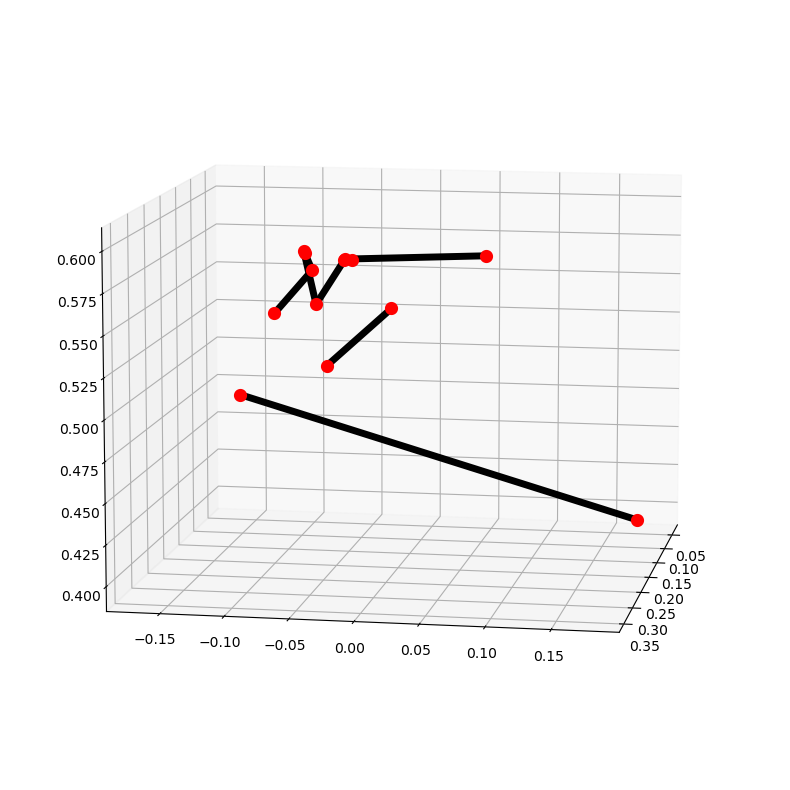

z: -553.9960861206055
YOU ARE IN WRONG POSITION FOR LONG TIME


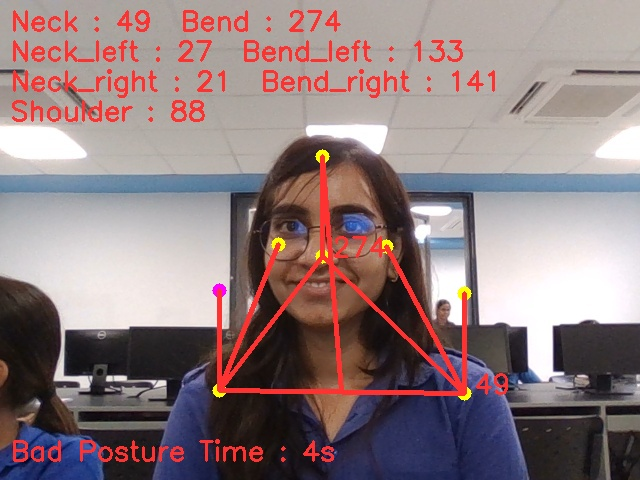

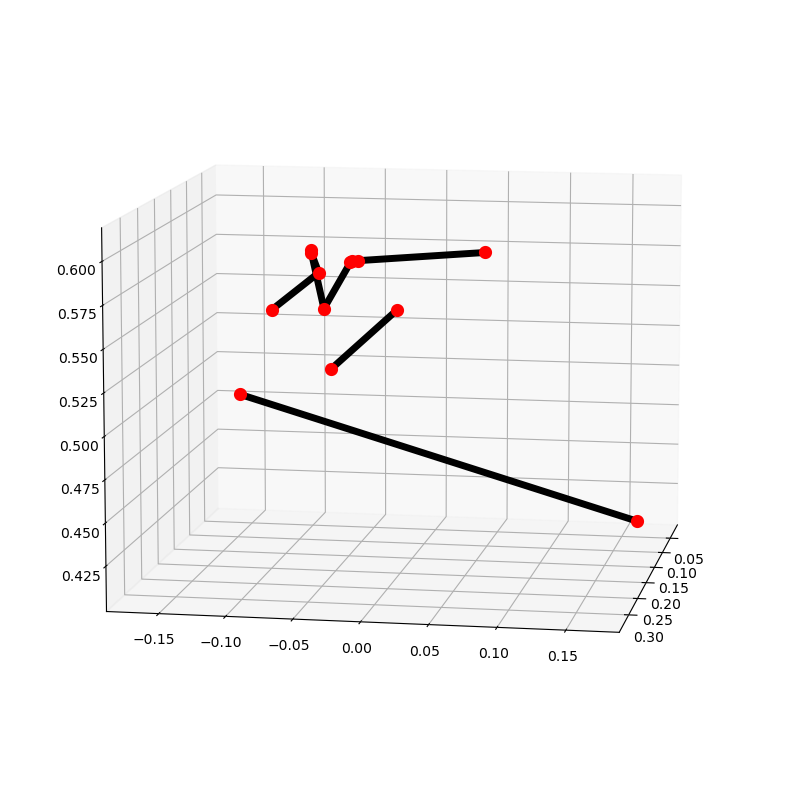

z: -424.4819641113281


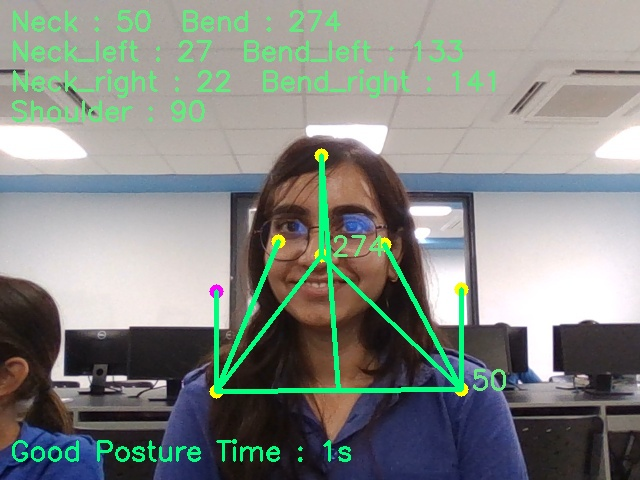

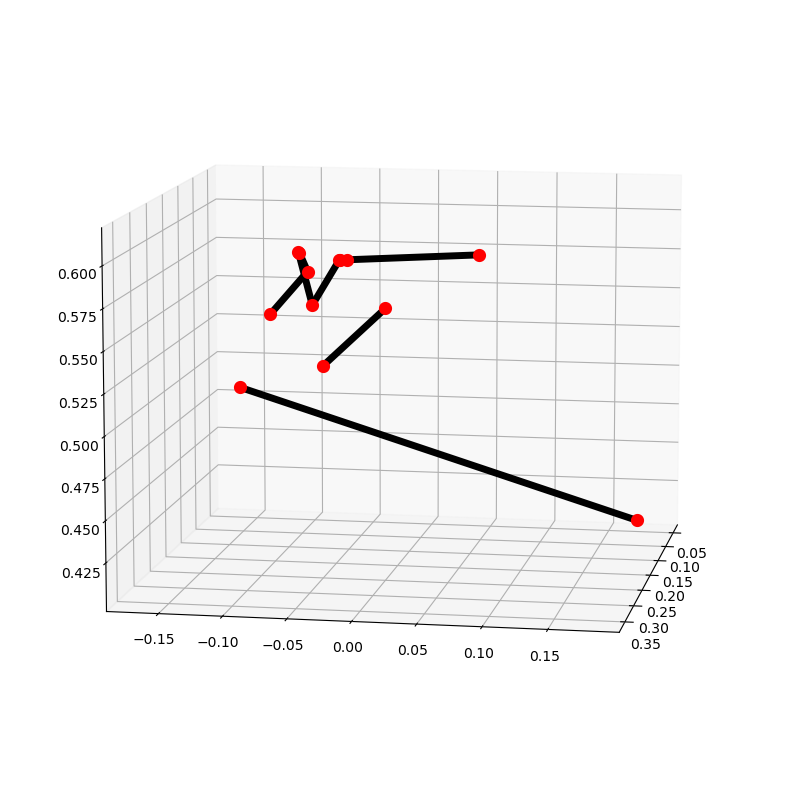

z: -580.560417175293


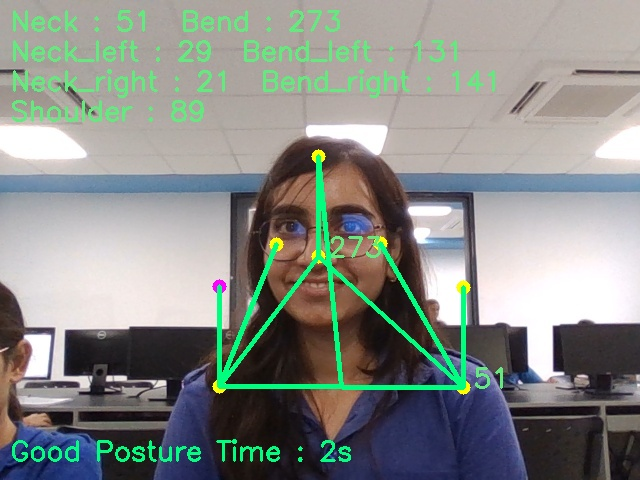

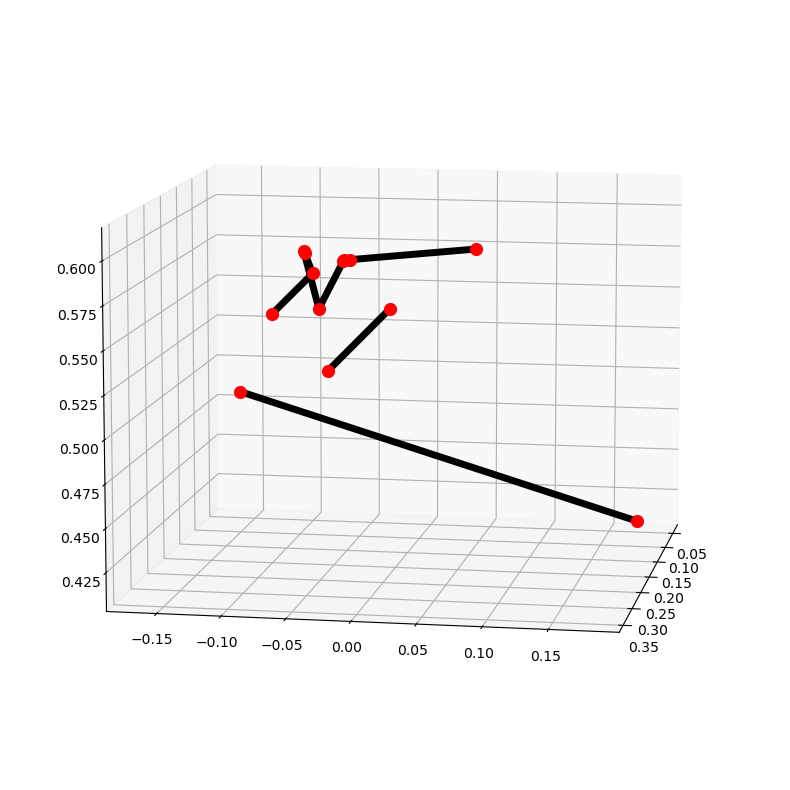

z: -484.91329193115234


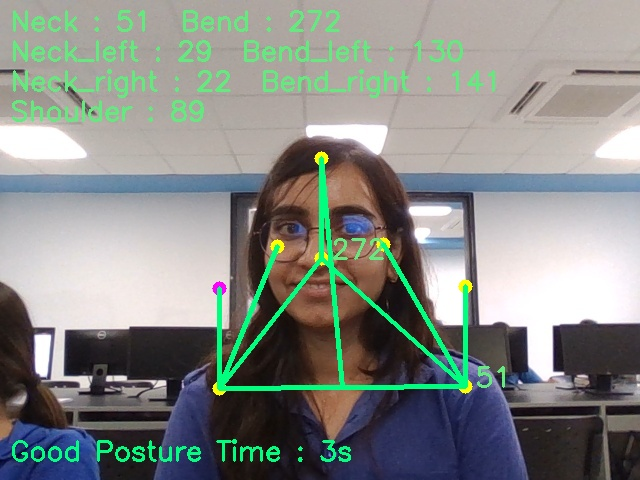

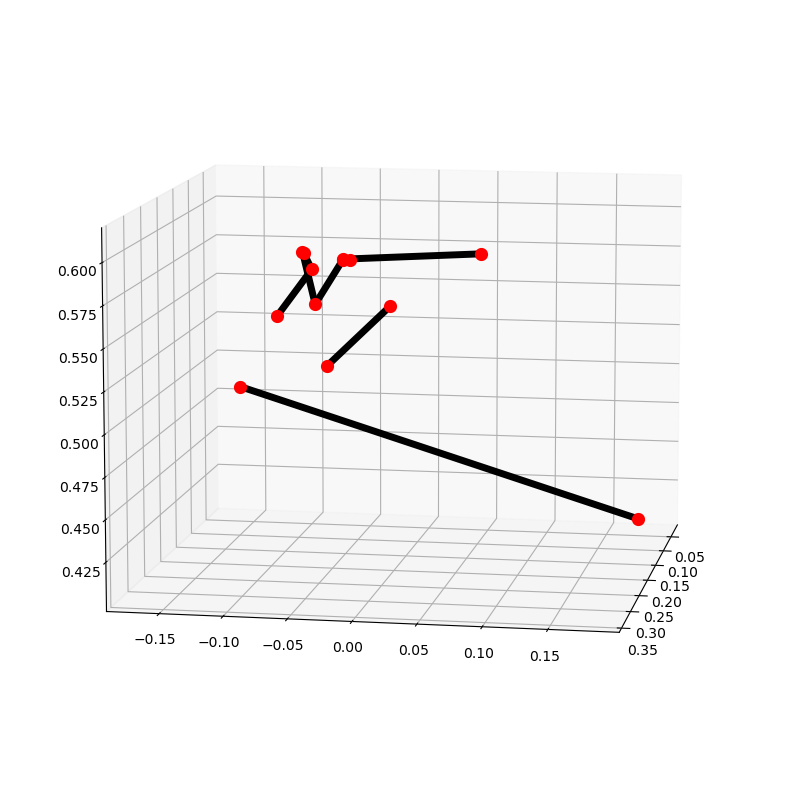

z: -618.0083465576172


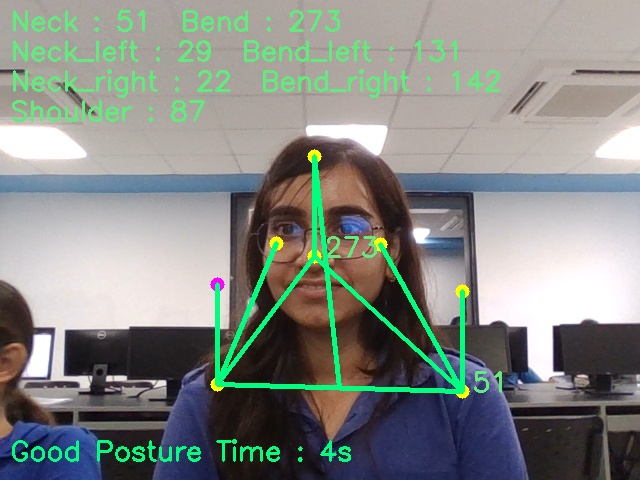

finished


In [10]:
from IPython.display import display, Image
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils
BG_COLOR = (192, 192, 192) # gray
images = []
folder='C:/Users/Owner/content/'
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    for filename in os.listdir(folder):
        image = cv2.imread(os.path.join(folder,filename))
        if image is  None:
            break
  #file='/content/input.png'
  #image = cv2.imread(file)
    # Get height and width.
        h,w = image.shape[:2]
    # Convert the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image.
        keypoints = pose.process(image)

    # Convert the image back to BGR.
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Use lm and lmPose as representative of the following methods.
        lm = keypoints.pose_landmarks
        lmPose = mp_pose.PoseLandmark

    # Acquire the landmark coordinates.
    # Once aligned properly, left or right should not be a concern.
    # Left shoulder.
        l_shldr_x = int(lm.landmark[lmPose.LEFT_SHOULDER].x * w)
        l_shldr_y = int(lm.landmark[lmPose.LEFT_SHOULDER].y * h)
    # Right shoulder
        r_shldr_x = int(lm.landmark[lmPose.RIGHT_SHOULDER].x * w)
        r_shldr_y = int(lm.landmark[lmPose.RIGHT_SHOULDER].y * h)
    # Left ear.
        l_ear_x = int(lm.landmark[lmPose.LEFT_EAR].x * w)
        l_ear_y = int(lm.landmark[lmPose.LEFT_EAR].y * h)

        r_ear_x = int(lm.landmark[lmPose.RIGHT_EAR].x * w)
        r_ear_y = int(lm.landmark[lmPose.RIGHT_EAR].y * h)
    # NOSE.
        l_nose_x = int(lm.landmark[lmPose.NOSE].x * w)
        l_nose_y = int(lm.landmark[lmPose.NOSE].y * h)
    # Calculate angles.
        l_neck_inclination = findAngle(l_shldr_x, l_shldr_y, l_ear_x, l_ear_y)
        l_bend_inclination = findAngle(l_nose_x, l_nose_y, l_shldr_x, l_shldr_y)
        r_neck_inclination = findAngle(r_shldr_x, r_shldr_y, r_ear_x, r_ear_y)
        r_bend_inclination = findAngle(l_nose_x, l_nose_y, r_shldr_x, r_shldr_y)
        shldr_inclination = findAngle(l_shldr_x, l_shldr_y, r_shldr_x, r_shldr_y)
    # Draw landmarks.
        cv2.circle(image, (l_shldr_x, l_shldr_y), 7, yellow, -1)
        cv2.circle(image, (r_shldr_x, r_shldr_y), 7, yellow, -1)
        cv2.circle(image, (l_ear_x, l_ear_y), 7, yellow, -1)
        cv2.circle(image, (r_ear_x, r_ear_y), 7, yellow, -1)
        mp_drawing.plot_landmarks(keypoints.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        z_nose=lm.landmark[lmPose.NOSE].z * w
        print(f'z: {lm.landmark[lmPose.NOSE].z * w}')
        if z_nose < -1100:
            cv2.putText(image, 'YOU ARE VERY CLOSER TO THE SCREEN', (10, 150), font, 0.9, red, 2)

    # Let's take y - coordinate of P3 100px above x1,  for display elegance.
    # Although we are taking y = 0 while calculating angle between P1,P2,P3.
        cv2.circle(image, (l_shldr_x, l_shldr_y - 100), 7, yellow, -1)
        cv2.circle(image, (r_shldr_x, r_shldr_y-100), 7, pink, -1)
        cv2.circle(image, (l_nose_x, l_nose_y), 7, yellow, -1)

    # Similarly, here we are taking y - coordinate 100px above x1. Note that
    # you can take any value for y, not necessarily 100 or 200 pixels.
        cv2.circle(image, (l_nose_x, l_nose_y - 100), 7, yellow, -1)

    # Put text, Posture and angle inclination.
    # Text string for display.
        angle_text_left = 'Neck_left : ' + str(int(l_neck_inclination)) + '  Bend_left : ' + str(int(l_bend_inclination))
        angle_text_right = 'Neck_right : ' + str(int(r_neck_inclination)) + '  Bend_right : ' + str(int(r_bend_inclination))
        angle_text_string = 'Neck : ' + str(int(l_neck_inclination+r_neck_inclination)) + '  Bend : ' + str(int(l_bend_inclination+r_bend_inclination))
        angle_text_shldr = 'Shoulder : ' + str(int(shldr_inclination))
        neck=l_neck_inclination+r_neck_inclination
        bend=l_bend_inclination+r_bend_inclination
        x_m_point = int((l_shldr_x +r_shldr_x )/2)
        y_m_point = int((l_shldr_y+r_shldr_y )/2)
    # Determine whether good posture or bad posture.
    # The threshold angles have been set based on intuition.
        if neck >= 50  and bend >=265:
            
            bad_frames = 0
            good_frames += 1# writing in a good frame posture
            cv2.putText(image, angle_text_string, (10, 30), font, 0.9, light_green, 2)
            cv2.putText(image, angle_text_left, (10, 60), font, 0.9, light_green, 2)
            cv2.putText(image, angle_text_right, (10, 90), font, 0.9, light_green, 2)
            cv2.putText(image, angle_text_shldr, (10, 120), font, 0.9, light_green, 2)
            cv2.putText(image, str(int(neck)), (l_shldr_x + 10, l_shldr_y), font, 0.9, light_green, 2)
            cv2.putText(image, str(int(bend)), (l_nose_x + 10, l_nose_y), font, 0.9, light_green, 2)
#             join lAndmarks
            cv2.line(image, (l_shldr_x, l_shldr_y), (l_ear_x, l_ear_y), green, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y), (r_shldr_x, r_shldr_y), green, 4)
            cv2.line(image, (r_shldr_x, r_shldr_y), (r_ear_x, r_ear_y), green, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y), (l_shldr_x, l_shldr_y - 100), green, 4)
            cv2.line(image, (r_shldr_x, r_shldr_y), (r_shldr_x, r_shldr_y - 100), green, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (l_shldr_x, l_shldr_y), green, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (r_shldr_x, r_shldr_y), green, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (l_nose_x, l_nose_y - 100), green, 4)
            cv2.line(image, (x_m_point,y_m_point), (l_nose_x, l_nose_y - 100), green, 4)

        else:
            good_frames = 0
            bad_frames += 1

            cv2.putText(image, angle_text_string, (10, 30), font, 0.9, red, 2)
            cv2.putText(image, angle_text_left, (10, 60), font, 0.9, red, 2)
            cv2.putText(image, angle_text_right, (10, 90), font, 0.9, red, 2)
            cv2.putText(image, angle_text_shldr, (10, 120), font, 0.9, red, 2)
            cv2.putText(image, str(int(neck)), (l_shldr_x + 10, l_shldr_y), font, 0.9, red, 2)
            cv2.putText(image, str(int(bend)), (l_nose_x + 10, l_nose_y), font, 0.9, red, 2)
#             join lankmarks
            cv2.line(image, (l_shldr_x, l_shldr_y), (l_ear_x, l_ear_y), red, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y), (r_shldr_x, r_shldr_y), red, 4)
            cv2.line(image, (r_shldr_x, r_shldr_y), (r_ear_x, r_ear_y), red, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y), (l_shldr_x, l_shldr_y - 100), red, 4)
            cv2.line(image, (r_shldr_x, r_shldr_y), (r_shldr_x, r_shldr_y - 100), red, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (l_shldr_x, l_shldr_y), red, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (r_shldr_x, r_shldr_y),red, 4)
            cv2.line(image, (l_nose_x, l_nose_y), (l_nose_x, l_nose_y - 100), red, 4)
            cv2.line(image, (x_m_point,y_m_point), (l_nose_x, l_nose_y - 100), red, 4)
     # Calculate the time of remaining in a particular posture.
    # good_time = (1 / fps) * good_frames
    # bad_time =  (1 / fps) * bad_frames

    # Pose time.
        if good_frames > 0:
            time_string_good = 'Good Posture Time : ' + str(round(good_frames, 1)) + 's'
            cv2.putText(image, time_string_good, (10, h - 20), font, 0.9, green, 2)
        else:
            time_string_bad = 'Bad Posture Time : ' + str(round(bad_frames, 1)) + 's'
            cv2.putText(image, time_string_bad, (10, h - 20), font, 0.9, red, 2)

    # If you stay in bad posture for more than 3 minutes (180s) send an alert.
        if bad_frames > 0:
            sendWarning()
    # Write frames.
        annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
        display(Image(data=cv2.imencode('.jpg', annotated_image)[1].tobytes()))

print('finished')